 Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their bank loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


## Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default. 

- NT is the abbreviation for New Taiwain. 


## Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

Please have ONE notebook and be prepared to explain how you worked in your pair.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


## Setup

In [1]:
# import libraries

import pandas as pd
import numpy as np
import csv
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# from scipy.special import logit, expit
# from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report, plot_roc_curve
# from sklearn.preprocessing import normalize
from collections import Counter
from imblearn.under_sampling import TomekLinks
import xgboost
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from matplotlib import pyplot as plt
import seaborn as sns

# Data Cleaning

In [2]:
df = pd.read_csv('training_data.csv' , index_col=0)
df.drop('ID', inplace = True)
pd.set_option('display.max_columns', None) # display all columns

In [3]:
print('train data:',df.shape)

train data: (22499, 24)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22499 entries, 28835 to 7624
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      22499 non-null  object
 1   X2      22499 non-null  object
 2   X3      22499 non-null  object
 3   X4      22499 non-null  object
 4   X5      22499 non-null  object
 5   X6      22499 non-null  object
 6   X7      22499 non-null  object
 7   X8      22499 non-null  object
 8   X9      22499 non-null  object
 9   X10     22499 non-null  object
 10  X11     22499 non-null  object
 11  X12     22499 non-null  object
 12  X13     22499 non-null  object
 13  X14     22499 non-null  object
 14  X15     22499 non-null  object
 15  X16     22499 non-null  object
 16  X17     22499 non-null  object
 17  X18     22499 non-null  object
 18  X19     22499 non-null  object
 19  X20     22499 non-null  object
 20  X21     22499 non-null  object
 21  X22     22499 non-null  object
 22  X23     22499 non-null  

In [5]:
df.sample(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
2758,70000,1,2,2,38,0,0,2,0,0,0,27000,31809,29776,30148,29918,29399,5600,0,1500,1057,2000,1035,0
24730,80000,1,3,1,49,0,0,0,0,-2,-2,77985,80886,82150,0,0,0,4200,3800,0,0,0,0,0
12000,20000,1,2,2,30,1,2,0,0,0,-2,18231,34558,17363,17569,0,0,0,1200,406,0,0,0,1
2970,380000,1,2,1,43,-1,0,0,0,0,-2,195221,188328,192624,149860,59256,61039,8000,8263,7127,4000,3000,2500,0
6196,50000,1,2,2,41,0,0,0,0,0,0,41993,43163,36546,6421,5263,-12,1942,1725,1000,400,0,0,0
23907,20000,1,2,2,21,0,0,0,0,0,0,18671,18497,19633,18347,9347,0,1614,1750,1000,1000,0,0,0
29984,20000,1,2,1,44,-2,-2,-2,-2,-2,-2,1822,2872,2712,2882,9235,1719,2890,2720,2890,9263,1824,1701,0
16635,30000,1,2,2,34,2,2,2,0,0,2,10522,10148,8587,8366,8528,7030,1200,0,1200,1500,0,460,1
17123,50000,2,2,2,27,0,0,0,0,0,0,48492,48356,32904,28864,29708,29921,1600,1715,2000,3010,2000,1100,0
7826,100000,2,1,2,32,1,2,0,0,-1,0,7130,6873,8101,8235,34087,34749,0,1500,565,36252,1500,2500,0


In [6]:
df.Y.value_counts()

0    17471
1     5028
Name: Y, dtype: int64

## Rename columns and make numeric

In [7]:
df.rename(columns={'X1': 'credit', 'X2': 'gender', 'X3': 'edu', 'X4': 'marital', 'X5': 'age',
                   'X6': 'sep', 'X7': 'aug', 'X8': 'jul', 'X9': 'jun', 'X10': 'may', 'X11': 'apr',
                   'X12': 'sep_s', 'X13': 'aug_s', 'X14': 'jul_s', 'X15': 'jun_s', 'X16': 'may_s',
                   'X17': 'apr_s', 'X18': 'sep_p', 'X19': 'aug_p', 'X20': 'jul_p', 'X21': 'jun_p',
                   'X22': 'may_p', 'X23': 'apr_p'}, inplace=True)
num_columns = ['credit', 'age', 'sep', 'aug', 'jul', 'jun', 'may', 'apr', 'sep_s', 'aug_s',
               'jul_s', 'jun_s', 'may_s', 'apr_s', 'sep_p', 'aug_p', 'jul_p', 'jun_p',
               'may_p', 'apr_p', 'Y']
for col in num_columns:
    df[col] = df[col].astype(int)
df.index = df.index.astype(int)

In [8]:
# df.drop(df[(df.marital == 0) | (df.marital == 3)].index, inplace = True)
# df.drop(df[(df.edu >= 4) & (df.edu <= 6)].index, inplace = True)

## Create new features

In [9]:
months_list = ['sep','aug','jul','jun','may','apr']
df['all_months'] = df[months_list].sum(axis=1)

# months_statement_list = ['sep_s','aug_s','jul_s','jun_s','may_s','apr_s']
months_statement_list = ['aug_s','jul_s','jun_s','may_s','apr_s']
df['statement_mean_per_credit'] = df[months_statement_list].mean(axis=1)/df.credit

# months_payment_list = ['sep_p','aug_p','jul_p','jun_p','may_p','apr_p']
months_payment_list = ['sep_p','aug_p','jul_p','jun_p','may_p']
df['statement_payment'] = ( df[months_statement_list].sum(axis=1) - \
                            df[months_payment_list].sum(axis=1) ) / df.credit

In [10]:
# Split data to be used in the models
# Create matrix of features
X = df.drop('Y', axis = 1) # grabs everything else but 'Survived'
# Create target variable
y = df['Y'] # y is the column we're trying to predict

# EDA

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22499 entries, 28835 to 7624
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   credit                     22499 non-null  int64  
 1   gender                     22499 non-null  object 
 2   edu                        22499 non-null  object 
 3   marital                    22499 non-null  object 
 4   age                        22499 non-null  int64  
 5   sep                        22499 non-null  int64  
 6   aug                        22499 non-null  int64  
 7   jul                        22499 non-null  int64  
 8   jun                        22499 non-null  int64  
 9   may                        22499 non-null  int64  
 10  apr                        22499 non-null  int64  
 11  sep_s                      22499 non-null  int64  
 12  aug_s                      22499 non-null  int64  
 13  jul_s                      22499 non-null  

In [12]:
X.credit.value_counts()

50000      2534
20000      1488
30000      1223
80000      1210
200000     1134
           ... 
800000        1
1000000       1
740000        1
690000        1
327680        1
Name: credit, Length: 80, dtype: int64

In [13]:
X.gender.value_counts()

2    13572
1     8927
Name: gender, dtype: int64

In [14]:
X.edu.value_counts()

2    10516
1     7919
3     3713
5      208
4       90
6       42
0       11
Name: edu, dtype: int64

In [15]:
X.marital.value_counts()

2    12026
1    10195
3      234
0       44
Name: marital, dtype: int64

In [16]:
X.age.value_counts().size

55

In [17]:
def feature_plot(df, ind, dep, plot_type, xlabel, xlog = 'n', ylog = 'n', color = u'#1f77b4'):
    ylabel = f'Default Payment'
    title = f'{ylabel} vs {xlabel}'
    file_name = f'{xlabel}.png'
    fig, ax = plt.subplots(figsize = [12,8])
    if plot_type == 'scatter':
        sns_obj = sns.scatterplot(data = df, x=ind, y=dep, ax=ax, color = color)
    elif plot_type == 'line':
        sns_obj = sns.lineplot(data = df, x=ind, y=dep, color = color)
    if xlog == 'y':
        set_x_log(sns_obj, ax)
    if ylog == 'y':
        set_y_log(sns_obj, ax)
    # what color is u'#1f77b4'? what color is None?
    ax.set_title(title, fontdict = {'fontsize': 14})
    ax.set_xlabel(xlabel, fontdict = {'fontsize': 12})
    ax.set_ylabel(ylabel, fontdict = {'fontsize': 12})
    plt.savefig(f'visualizations/{file_name}')

# Feature Engineering

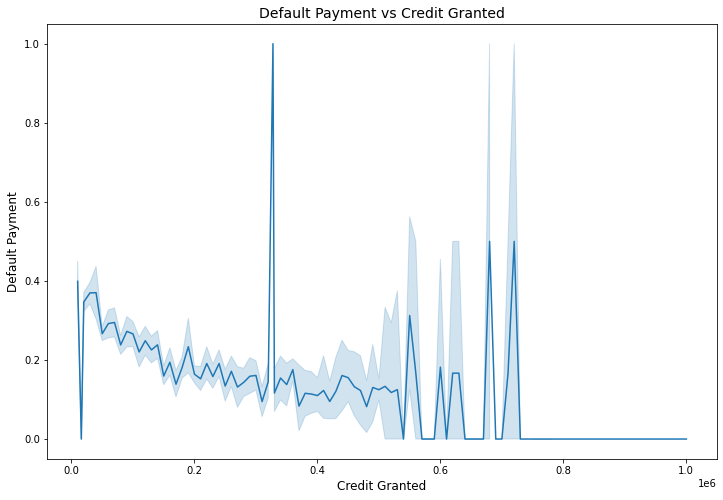

In [18]:
feature_plot(df, df.credit, df.Y, 'line', 'Credit Granted', xlog = 'n', ylog = 'n')

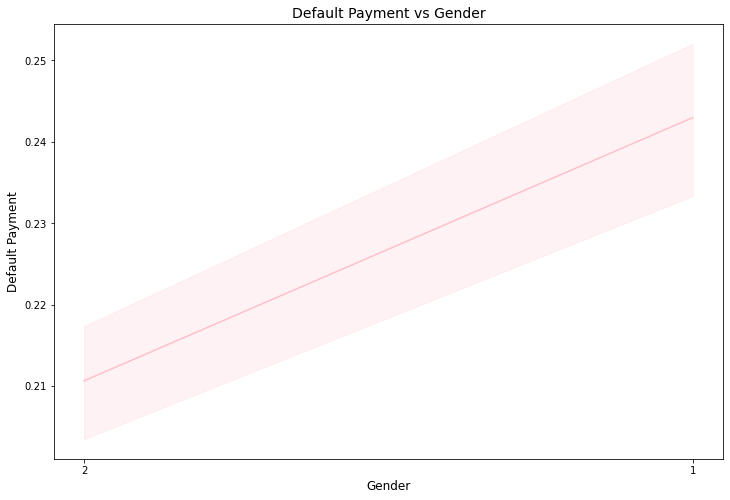

In [19]:
feature_plot(df, df.gender, df.Y, 'line', 'Gender', xlog = 'n', ylog = 'n',
             color = 'pink')

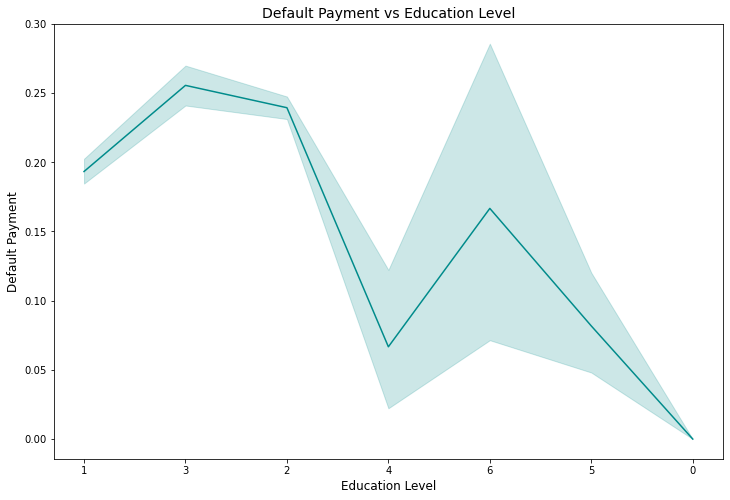

In [20]:
feature_plot(df, df.edu, df.Y, 'line', 'Education Level', xlog = 'n', ylog = 'n',
             color = 'darkcyan')

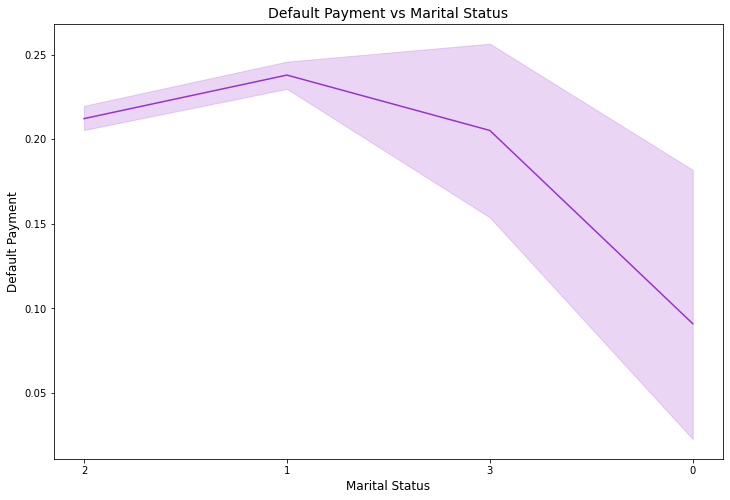

In [21]:
feature_plot(df, df.marital, df.Y, 'line', 'Marital Status', xlog = 'n', ylog = 'n',
             color = 'darkorchid')

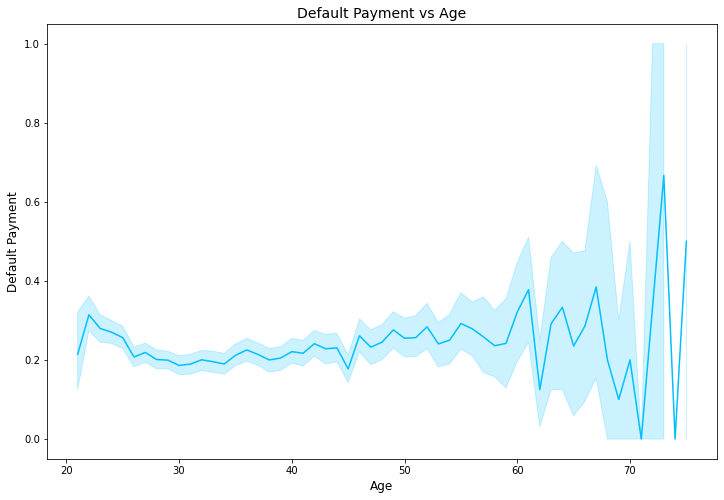

In [22]:
feature_plot(df, df.age, df.Y, 'line', 'Age', xlog = 'n', ylog = 'n',
             color = 'deepskyblue')

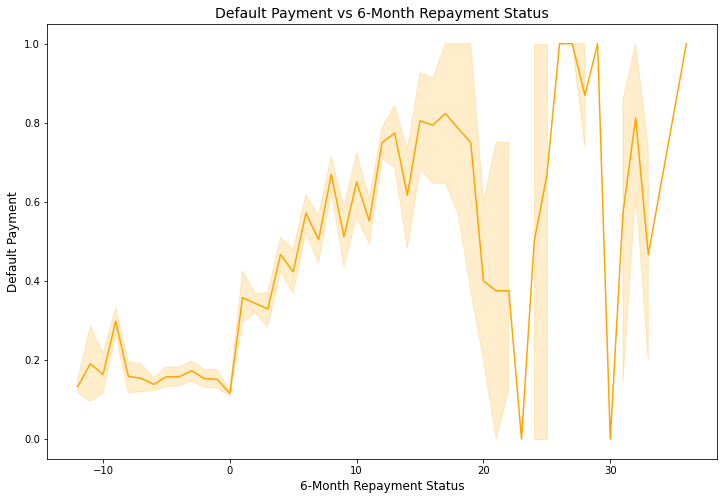

In [23]:
feature_plot(df, df.all_months, df.Y, 'line', '6-Month Repayment Status', xlog = 'n', ylog = 'n',
             color = 'orange')

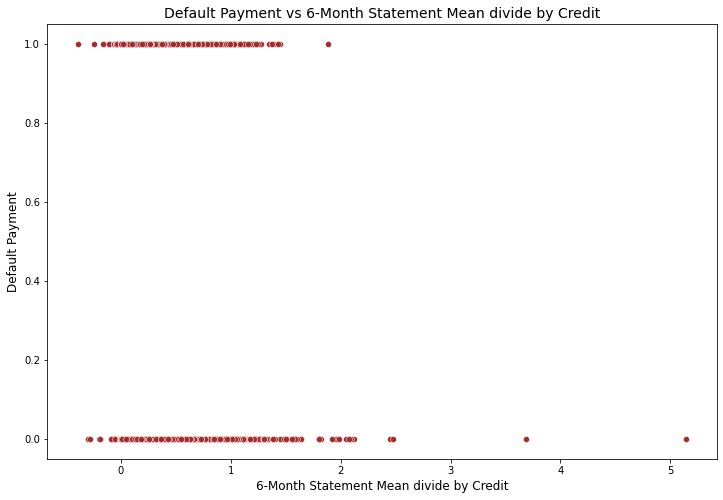

In [24]:
feature_plot(df, df.statement_mean_per_credit, df.Y, 'scatter',
             '6-Month Statement Mean divide by Credit', xlog = 'n', ylog = 'n',
             color = 'brown')

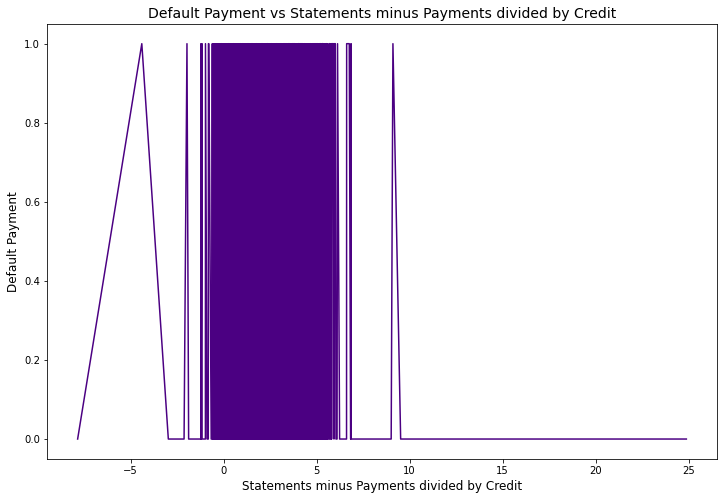

In [25]:
feature_plot(df, df.statement_payment, df.Y, 'line',
             'Statements minus Payments divided by Credit', xlog = 'n', ylog = 'n',
             color = 'indigo')

In [26]:
df[df.all_months==0]

,credit,gender,edu,marital,age,sep,aug,jul,jun,may,apr,sep_s,aug_s,jul_s,jun_s,may_s,apr_s,sep_p,aug_p,jul_p,jun_p,may_p,apr_p,Y,all_months,statement_mean_per_credit,statement_payment
28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1,0,0.934295,4.466332
690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0,0,0.570325,2.750237
6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1,0,0.473060,1.935300
9405,110000,2,2,2,23,0,0,0,0,0,0,111271,111532,107998,79211,77881,80628,6000,4016,3000,3000,4000,4000,0,0,0.831364,3.974855
12899,50000,1,2,2,31,2,0,0,0,-1,-1,49804,28662,29476,4011,1000,0,2000,1500,1000,1000,0,0,0,0,0.252596,1.152980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24992,340000,1,2,1,40,0,0,0,0,0,0,147943,144543,146603,149519,151697,154499,5169,5333,5366,5550,7000,915,0,0,0.439330,2.113068
2065,180000,1,2,1,26,0,0,0,2,-1,-1,175539,138825,51686,2594,171716,181693,3826,7000,0,171716,13400,0,1,0,0.607238,1.947622
8413,30000,2,2,2,21,0,0,0,0,0,0,26757,26831,26620,26134,26865,25752,1520,1339,852,2067,1400,100,0,0,0.881347,4.167467
13231,90000,2,2,2,23,0,0,0,0,0,0,42105,43919,46812,44976,46406,47625,2500,3970,2500,2500,2500,1700,1,0,0.510529,2.397422


# Feature Selection

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=729)

## Prepare training set

In [28]:
# def prep_train_test(X_train, X_test):
ss = StandardScaler()

# prep train
X_train_nums = X_train.select_dtypes(['int64','float64'])
ss.fit(X_train_nums)
nums_df = pd.DataFrame(ss.transform(X_train_nums),
                      index=X_train_nums.index)

X_train_cat = X_train.select_dtypes('object')
ohe = OneHotEncoder(
#         drop='first',
    handle_unknown='ignore',
    sparse=False)

dums = ohe.fit_transform(X_train_cat)
dums_df = pd.DataFrame(dums,
                       columns=ohe.get_feature_names(),
                       index=X_train_cat.index)

X_train_fin = pd.concat([nums_df,
             dums_df], axis=1)

# prep test
X_test_cat = X_test.select_dtypes('object')
test_dums = ohe.transform(X_test_cat)
test_dums_df = pd.DataFrame(test_dums,
                       columns=ohe.get_feature_names(),
                      index=X_test_cat.index)

X_test_nums = X_test.select_dtypes(['int64','float64'])
test_nums = ss.transform(X_test_nums)
test_nums_df = pd.DataFrame(test_nums,
                           index=X_test_nums.index)

X_test_fin = pd.concat([test_nums_df,
             test_dums_df], axis=1)

# return X_train_fin, X_test_fin

# Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

## Logistic Regression - no dummying, no undersampling

In [29]:
def log_model(X, y):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                       random_state=1)
    # Scale the data for modeling
    cred_scaler = StandardScaler()
    cred_scaler.fit(X_train)
    X_train_sc = cred_scaler.transform(X_train)
    X_test_sc = cred_scaler.transform(X_test)

    # Train a logistic regresssion model with the train data
    cred_model = LogisticRegression(random_state=42)
    cred_model.fit(X_train_sc, y_train)
    y_pred = cred_model.predict(X_test_sc)
    print('Num features: ', len(columns))
    print('Model score: ', cred_model.score(X_test_sc, y_test))
    print('Model F1: ', f1_score(y_test, y_pred))
    print('Cross validation score: ', cross_val_score(cred_model, X_test_sc, y_test, cv=5) )
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    fig, ax = plt.subplots(2,1, figsize = [6,8])
    plot_confusion_matrix(cred_model, X_test_sc, y_test, ax = ax[0])
    plot_roc_curve(cred_model, X_test_sc, y_test, ax = ax[1])

### Using original features

Num features:  23
Model score:  0.8119111111111111
Model F1:  0.38128654970760234
Cross validation score:  [0.81155556 0.80888889 0.80088889 0.79644444 0.79466667]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4358
           1       0.74      0.26      0.38      1267

    accuracy                           0.81      5625
   macro avg       0.78      0.62      0.64      5625
weighted avg       0.80      0.81      0.77      5625



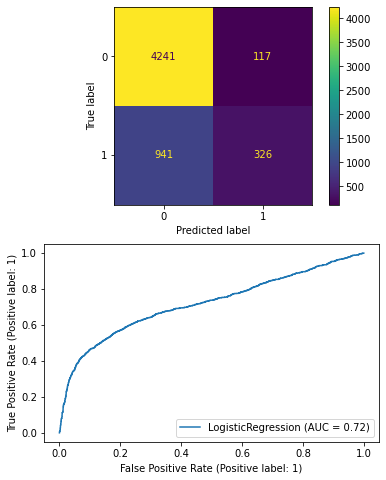

In [30]:
columns = ['credit', 'gender', 'edu', 'marital', 'age', 'sep', 'aug', 'jul', 'jun',
       'may', 'apr', 'sep_s', 'aug_s', 'jul_s', 'jun_s', 'may_s', 'apr_s',
       'sep_p', 'aug_p', 'jul_p', 'jun_p', 'may_p', 'apr_p']
log_model(df[columns], y)

### Using original + engineered features

Num features:  26
Model score:  0.8110222222222222
Model F1:  0.38448176027793857
Cross validation score:  [0.81244444 0.81422222 0.80088889 0.79733333 0.79555556]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4358
           1       0.72      0.26      0.38      1267

    accuracy                           0.81      5625
   macro avg       0.77      0.62      0.64      5625
weighted avg       0.80      0.81      0.77      5625



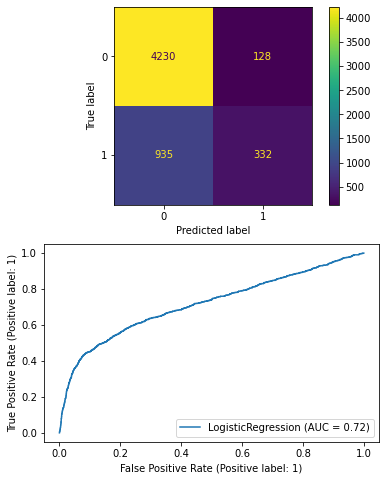

In [31]:
columns = ['credit', 'gender', 'edu', 'marital', 'age', 'sep', 'aug', 'jul', 'jun',
           'may', 'apr', 'sep_s', 'aug_s', 'jul_s', 'jun_s', 'may_s', 'apr_s',
           'sep_p', 'aug_p', 'jul_p', 'jun_p', 'may_p', 'apr_p', 'all_months',
           'statement_mean_per_credit', 'statement_payment']
log_model(df[columns], df.Y)

## KNN - with dummying, no undersamplying

In [32]:
def knn(X_train_fin, X_test_fin, y_train, y_test):
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train_fin, y_train)
    y_pred = knn_model.predict(X_test_fin)
    print('Num features: ', len(columns))
    print('Model score: ', knn_model.score(X_test_fin, y_test))
    print('Model F1: ', f1_score(y_test, y_pred))
    print('Cross validation score: ', cross_val_score(knn_model, X_test_fin, y_test, cv=5) )
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    fig, ax = plt.subplots(2,1, figsize = [6,8])
    plot_confusion_matrix(knn_model, X_test_fin, y_test, ax = ax[0])
    plot_roc_curve(knn_model, X_test_fin, y_test, ax = ax[1])

In [33]:
X_train_fin, X_test_fin = prep_train_test(X_train, X_test)
knn(X_train_fin, X_test_fin, y_train, y_test)

NameError: name 'prep_train_test' is not defined

## LogisticRegression - with dummying, Tomek Link undersampling

In [ ]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train_fin, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
def log_model_dum_us(X_train, X_test, y_train, y_test):
    log_model2 = LogisticRegression(random_state=729, max_iter=1000)
    log_model2.fit(X_train, y_train)
    y_pred = log_model2.predict(X_test)
    print('Num features: ', len(columns))
    print('Model score: ', log_model2.score(X_test, y_test))
    print('Model F1: ', f1_score(y_test, y_pred))
    print('Cross validation score: ', cross_val_score(log_model2, X_test, y_test, cv=5) )
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    fig, ax = plt.subplots(2,1, figsize = [6,8])
    plot_confusion_matrix(log_model2, X_test, y_test, ax = ax[0])
    plot_roc_curve(log_model2, X_test, y_test, ax = ax[1])

In [ ]:
log_model_dum_us(X_res, X_test_fin, y_res, y_test)

## Decision Tree + GridSearch - no dummying, no undersampling

In [ ]:
def decision_tree(X, y):
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.25, random_state=1)
    
    dtc = DecisionTreeClassifier()
    params_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 3, 2],
        'min_samples_split': [2, 10, 20]
    }
    gridsearch_model = GridSearchCV(estimator = dtc, param_grid = params_grid)
    
    gridsearch_model.fit(X_train, y_train)
    print(gridsearch_model.best_params_)
    best_model = gridsearch_model.best_estimator_
    best_model.score(X_test, y_test)
    
    y_pred = best_model.predict(X_test)
    print('Num features: ', len(columns))
    print('Model score: ', best_model.score(X_test, y_test))
    print('Model F1: ', f1_score(y_test, y_pred))
    print('Full Classification Report:')
    print(classification_report(y_test, y_pred))
    fig, ax = plt.subplots(2,1, figsize = [6,8])
    plot_confusion_matrix(best_model, X_test, y_test, ax = ax[0])
    plot_roc_curve(best_model, X_test, y_test, ax = ax[1])

In [ ]:
columns = ['credit', 'gender', 'edu', 'marital', 'age', 'sep', 'aug', 'jul', 'jun',
           'may', 'apr', 'sep_s', 'aug_s', 'jul_s', 'jun_s', 'may_s', 'apr_s',
           'sep_p', 'aug_p', 'jul_p', 'jun_p', 'may_p', 'apr_p', 'all_months',
           'statement_mean_per_credit', 'statement_payment']
decision_tree(df[columns], df.Y)

## Using pipelines - DecisionTree, dummies, no undersampling

In [ ]:
X_train_nums = X_train.select_dtypes(['int64', 'float64'])

ss = StandardScaler()

ss.fit(X_train_nums)
nums_df = pd.DataFrame(ss.transform(X_train_nums),
                      index=X_train_nums.index)

X_train_cat = X_train.select_dtypes('object')

ohe = OneHotEncoder(
    drop='first',
    sparse=False)

dums = ohe.fit_transform(X_train_cat)
dums_df = pd.DataFrame(dums,
                       columns=ohe.get_feature_names(),
                       index=X_train_cat.index)

numerical_pipeline = Pipeline(steps=[
    ('ss', StandardScaler())
])
                
categorical_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(
                         sparse=False, handle_unknown='ignore'))
])

trans = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, X_train_nums.columns),
    ('categorical', categorical_pipeline, X_train_cat.columns)
])

model_pipe = Pipeline(steps=[
    ('trans', trans),
    ('clf', DecisionTreeClassifier())
])

In [ ]:
model_pipe.fit(X_train, y_train);

In [ ]:
print('Pipeline score:', model_pipe.score(X_train, y_train))

In [ ]:
y_hat = model_pipe.predict(X_train)

In [ ]:
pipe_grid = {'clf__criterion': ['gini', 'entropy'],
             'clf__max_depth': [None, 5, 3, 2],
             'clf__min_samples_split': [2, 10, 20]}
gs_pipe = GridSearchCV(estimator=model_pipe, param_grid=pipe_grid)

gs_pipe.fit(X_train, y_train);

In [ ]:
print(gs_pipe.best_params_)
gs_model = gs_pipe.best_estimator_
gs_model.score(X_test, y_test)
y_pred = gs_model.predict(X_test)
print('Num features: ', len(columns))
print('Model score: ', gs_model.score(X_test, y_test))
print('Model F1: ', f1_score(y_test, y_pred))
print('Full Classification Report:')
print(classification_report(y_test, y_pred))
fig, ax = plt.subplots(2,1, figsize = [6,8])
plot_confusion_matrix(gs_model, X_test, y_test, ax = ax[0])
plot_roc_curve(gs_model, X_test, y_test, ax = ax[1])

## Another implementation of Pipeline

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])
cv = GridSearchCV(pipeline, param_grid=pipe_grid)
cv.fit(X_train.select_dtypes(['int64','float64']), y_train)
y_pred = cv.predict(X_test.select_dtypes(['int64','float64']))

In [ ]:
f1_score(y_test,y_pred)

## Random Forest + Dummying + Tomek Links

In [ ]:
rfr = RandomForestClassifier(max_features='sqrt',
                            max_samples=0.5,
                            random_state=729)
rfr.fit(X_res, y_res)
rfr.score(X_test_fin, y_test)
y_pred = rfr.predict(X_test_fin)
print('Num features: ', len(columns))
print('Model score: ', rfr.score(X_test_fin, y_test))
print('Model F1: ', f1_score(y_test, y_pred))
print('Full Classification Report:')
print(classification_report(y_test, y_pred))
fig, ax = plt.subplots(2,1, figsize = [6,8])
plot_confusion_matrix(rfr, X_test_fin, y_test, ax = ax[0])
plot_roc_curve(rfr, X_test_fin, y_test, ax = ax[1])

## Extremely Randomized Trees

In [ ]:
etr = ExtraTreesClassifier(max_features='sqrt',
                         max_samples=0.5,
                         bootstrap=True,
                         random_state=1)
etr.fit(X_res, y_res)
rfr.score(X_test_fin, y_test)
y_pred = etr.predict(X_test_fin)
print('Num features: ', len(columns))
print('Model score: ', etr.score(X_test_fin, y_test))
print('Model F1: ', f1_score(y_test, y_pred))
print('Full Classification Report:')
print(classification_report(y_test, y_pred))
fig, ax = plt.subplots(2,1, figsize = [6,8])
plot_confusion_matrix(etr, X_test_fin, y_test, ax = ax[0])
plot_roc_curve(etr, X_test_fin, y_test, ax = ax[1])

## RandomSearch - Logistic Regression - failed to converge

In [ ]:
# log_reg_grid = {'C': stats.uniform(loc=0, scale=1),
#                 'l1_ratio': stats.expon(scale=0.2)}
# rs = RandomizedSearchCV(estimator=LogisticRegression(penalty='elasticnet',
#                                                      solver='saga',
#                                                      max_iter=2000,
#                                                      random_state=729),
#                         param_distributions=log_reg_grid,
#                         random_state=729)

# rs.fit(X_res, y_res)
# rs.best_params_

## DecisionTree, GridSearch, dummying, Tomek Links

In [ ]:
def decision_tree_dum_us_gs(X_train, X_test, y_train, y_test):
    dtc = DecisionTreeClassifier()
    params_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 5, 3, 2],
        'min_samples_split': [2, 5, 10, 20, 30]
    }
    gridsearch_model = GridSearchCV(estimator = dtc, param_grid = params_grid)
    
    gridsearch_model.fit(X_train, y_train)
    print(gridsearch_model.best_params_)
    best_model = gridsearch_model.best_estimator_
    best_model.score(X_test, y_test)
    
    y_pred = best_model.predict(X_test)
    print('Num features: ', len(columns))
    print('Model score: ', best_model.score(X_test, y_test))
    print('Model F1: ', f1_score(y_test, y_pred))
    print('Full Classification Report:')
    print(classification_report(y_test, y_pred))
    fig, ax = plt.subplots(2,1, figsize = [6,8])
    plot_confusion_matrix(best_model, X_test, y_test, ax = ax[0])
    plot_roc_curve(best_model, X_test, y_test, ax = ax[1])

In [ ]:
decision_tree_dum_us_gs(X_res, X_test_fin, y_res, y_test)

## XGBoost + Dummying + Tomek Links

In [37]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 16078, 1: 5028})


In [ ]:
grad_boost = xgboost.XGBClassifier(random_state=729, objective='reg:squarederror')
grad_boost.fit(X_res, y_res)
grad_boost.score(X_test_fin, y_test)
y_pred = grad_boost.predict(X_test_fin)
print('Num features: ', len(columns))
print('Model score: ', grad_boost.score(X_test_fin, y_test))
print('Model F1: ', f1_score(y_test, y_pred))
print('Full Classification Report:')
print(classification_report(y_test, y_pred))
fig, ax = plt.subplots(2,1, figsize = [6,8])
plot_confusion_matrix(grad_boost, X_test_fin, y_test, ax = ax[0])
plot_roc_curve(grad_boost, X_test_fin, y_test, ax = ax[1])

## XGBoost + GridSearch + Dummying + Tomek Links

In [35]:
def xgb_class(X_train, X_test, y_train, y_test):
    parameters = {'nthread': [4],  # when use hyperthread, xgboost may become slower
#               'objective': ['binary:logistic'],
              'learning_rate': [0.05],  # so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], # number of trees, change it to 1000 for better results
              'missing': [-999],
              'seed': [1337]}
    gs = GridSearchCV(grad_boost, parameters, n_jobs=5, 
                       cv=StratifiedKFold(n_splits=5, shuffle=True), 
                       scoring='roc_auc',
                       verbose=2, refit=True)

    gs.fit(X_train, y_train)

    print(gs.best_params_)
    best_model = gs.best_estimator_
    best_model.score(X_test_fin, y_test)
    y_pred = best_model.predict(X_test_fin)
    print('Num features: ', len(columns))
    print('Model score: ', best_model.score(X_test_fin, y_test))
    print('Model F1: ', f1_score(y_test, y_pred))
    print('Cross validation score: ', cross_val_score(best_model, X_test_fin, y_test, cv=5) )
    print('Full Classification Report:')
    print(classification_report(y_test, y_pred))
    fig, ax = plt.subplots(2,1, figsize = [6,8])
    plot_confusion_matrix(best_model, X_test_fin, y_test, ax = ax[0])
    plot_roc_curve(best_model, X_test_fin, y_test, ax = ax[1])
    
    return best_model

### XGBClassifier With Regression: Squared Error

In [39]:
grad_boost = xgboost.XGBClassifier(random_state = 729, objective='reg:squarederror')
xgb_class(X_res, X_test_fin, y_res, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/wax/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
/Users/wax/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.gender, edu, marital

### XGBClassifier With Binary Logistic

In [ ]:
grad_boost = xgboost.XGBClassifier(random_state = 729)
xgb_class(X_res, X_test_fin, y_res, y_test)

### XGBRFClassifier 

In [ ]:
grad_boost = xgboost.XGBRFClassifier(random_state = 729)
xgb_class(X_res, X_test_fin, y_res, y_test)

# Model Evaluation

In [ ]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.5, random_state=729)

In [ ]:
# def prep_train_test(X_train, X_test):
ss = StandardScaler()

# prep train
X_train_nums = X_train.select_dtypes(['int64','float64'])
ss.fit(X_train_nums)
nums_df = pd.DataFrame(ss.transform(X_train_nums),
                      index=X_train_nums.index)

X_train_cat = X_train.select_dtypes('object')
ohe = OneHotEncoder(
        drop='first',
#     handle_unknown='ignore',
    sparse=False)

dums = ohe.fit_transform(X_train_cat)
dums_df = pd.DataFrame(dums,
                       columns=ohe.get_feature_names(),
                       index=X_train_cat.index)

X_train_fin = pd.concat([nums_df,
             dums_df], axis=1)

# prep test
X_test_cat = X_test.select_dtypes('object')
test_dums = ohe.transform(X_test_cat)
test_dums_df = pd.DataFrame(test_dums,
                       columns=ohe.get_feature_names(),
                      index=X_test_cat.index)

X_test_nums = X_test.select_dtypes(['int64','float64'])
test_nums = ss.transform(X_test_nums)
test_nums_df = pd.DataFrame(test_nums,
                           index=X_test_nums.index)
X_test_fin = pd.concat([test_nums_df,
             test_dums_df], axis=1)

# return X_train_fin, X_test_fin

# Final Model

In [ ]:
grad_boost = xgboost.XGBClassifier(random_state = 729)
final_model = xgb_class(X_train_fin, X_test_fin, y_train, y_test)

In [ ]:
df_test = pd.read_csv('holdout_data.csv' , index_col=0)

In [ ]:
df_test.rename(columns={'X1': 'credit', 'X2': 'gender', 'X3': 'edu', 'X4': 'marital', 'X5': 'age',
                   'X6': 'sep', 'X7': 'aug', 'X8': 'jul', 'X9': 'jun', 'X10': 'may', 'X11': 'apr',
                   'X12': 'sep_s', 'X13': 'aug_s', 'X14': 'jul_s', 'X15': 'jun_s', 'X16': 'may_s',
                   'X17': 'apr_s', 'X18': 'sep_p', 'X19': 'aug_p', 'X20': 'jul_p', 'X21': 'jun_p',
                   'X22': 'may_p', 'X23': 'apr_p'}, inplace=True)
cat_columns = ['gender', 'edu', 'marital']
for col in cat_columns:
    df_test[col] = df_test[col].astype(object)
df_test.index = df_test.index.astype(int)

In [ ]:
months_list = ['sep','aug','jul','jun','may','apr']
df_test['all_months'] = df_test[months_list].sum(axis=1)

months_statement_list = ['aug_s','jul_s','jun_s','may_s','apr_s']
df_test['statement_mean_per_credit'] = df_test[months_statement_list].mean(axis=1)/df_test.credit

months_payment_list = ['sep_p','aug_p','jul_p','jun_p','may_p']
df_test['statement_payment'] = ( df_test[months_statement_list].sum(axis=1) - \
                            df_test[months_payment_list].sum(axis=1) ) / df_test.credit

In [ ]:
df_test.info()

In [ ]:
X_test = df_test

In [ ]:
X_test.age.value_counts().size

In [ ]:
X_test_cat = X_test.select_dtypes('object')
test_dums = ohe.transform(X_test_cat)
test_dums_df = pd.DataFrame(test_dums,
                       columns=ohe.get_feature_names(),
                      index=X_test_cat.index)

X_test_nums = X_test.select_dtypes(['int64','float64'])
test_nums = ss.transform(X_test_nums)
test_nums_df = pd.DataFrame(test_nums,
                           index=X_test_nums.index)
X_fin = pd.concat([test_nums_df,
             test_dums_df], axis=1)

In [ ]:
y_pred = final_model.predict(X_fin)

In [ ]:
y_pred.size

In [ ]:
pred_df = pd.DataFrame(y_pred)
pred_df.to_csv('cred_preds_wei_alex_xin.csv')

In [ ]:
with open('cred_preds_wei_alex_xin.csv', mode = 'w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter = '\n')
    csv_writer.writerow(['Y'])
    csv_writer.writerow(y_pred)